<a href="https://colab.research.google.com/github/DanyPao/DataScience2/blob/main/Primera_Preentrega_Daniela_Esposito_Smoker_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Proyecto: Smoker Status Prediction**

Data Science II ~ Primera pre-entrega


##Datos:

####Alumna: Daniela Paola Espósito
####Comisión: 61145
####Docente: David Silvera
####Tutora: María Soledad Gutiérrez


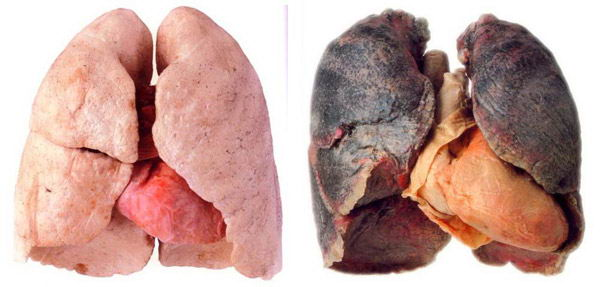

##Introducción:
#####Según la Organización Mundial de la Salud (OMS), el tabaco es la primera causa evitable de enfermedad, invalidez y muerte prematura en el mundo.
#####El tabaquismo es la causa de...


- Más del 90% de los casos de bronquitis.
- Del 95% de los casos de cáncer de pulmón.
- Del 30% de todas las cardiopatías coronarias.
- Parte importante de los casos de cáncer de esófago, vejiga urinaria, cavidad bucal y laringe.(1)

#####Por todo lo anterior, es de gran importancia poder detectar si una persona es fumadora o no, a través de estudios de rutina.

#####Muchas veces por diversas razones, los pacientes no son sinceros o entran en una emergencia sin posibilidad de preguntar si fuma o no, y por lo tanto, cuando el médico no tiene los datos justos, no puede diagnosticar correctamente.

#####Si con este modelo se logra predicir el tabaquismo de una persona, no importará si se sabe o no, si esa persona fuma para que el medico pueda diagnosticar eficazmente.

###Objetivo

El objetivo de este proyecto es poder si crear un modelo que pueda predecir el estado de tabaquismo de un individuo utilizando bioseñales.

###Hipótesis

Un modelo de aprendizaje automático será capaz de clasificar con precisión las instancias en diferentes categorías basadas en los siguientes atributos:

- "Fuma"

- "No Fuma"

###Preguntas:

- ¿Qué marcadores biológicos están relacionados con el tabaquismo?
- ¿Hay alguna bioseñal que por si sola pueda indicar si es fumador?
- ¿Qué indicadores combinados pueden predecir si padece tabaquismo?


##EDA y Data Wrangling

###Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
!pip install dataprep
from dataprep.eda import create_report

import warnings
warnings.filterwarnings('ignore')

cmap=colors.ListedColormap('RdBu_r')

###Carga de datos

In [2]:
url = 'https://raw.githubusercontent.com/DanyPao/DataScience2/main/train_dataset.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0


###Normalización

######Traducción de variables

In [4]:
df=df.rename(columns={'age':'edad','height(cm)':'altura','weight(kg)':'peso','waist(cm)':'cintura','eyesight(left)':'vista_izq','eyesight(right)':'vista_der','hearing(left)':'audicion_izq','hearing(right)':'audicion_der','systolic':'sistolica','relaxation':'diastolica','fasting blood sugar':'glucosa','Cholesterol':'colesterol','triglyceride':'trigliceridos','hemoglobin':'hemoglobina','Urine protein':'proteina_orina','serum creatinine':'creatinina','dental caries':'caries_dental','smoking':'fumador'})

In [5]:
df.columns

Index(['edad', 'altura', 'peso', 'cintura', 'vista_izq', 'vista_der',
       'audicion_izq', 'audicion_der', 'sistolica', 'diastolica', 'glucosa',
       'colesterol', 'trigliceridos', 'HDL', 'LDL', 'hemoglobina',
       'proteina_orina', 'creatinina', 'AST', 'ALT', 'Gtp', 'caries_dental',
       'fumador'],
      dtype='object')

###Descripción de Variables

edad: edad del paciente (años)

altura: altura del paciente (cm)

peso: peso corporal (kg)

cintura: longitud de la circunsferencia de la cintura (cm)

vista_izq: visión del ojo izquierdo ('0' a '10', con '0' como visión perfecta y '10' como ceguedad total)

vista_der: visión del ojo derecho ('0' a '10', con '0' como visión perfecta y '10' como ceguedad total)

audicion_izq: audición oído izquierdo ('1' y '2', con '1'como 'oye' y '2' como 'no oye')

audicion_der: audición oído derecho ('1' y '2', con '1'como 'oye' y '2' como 'no oye')

sistolica: presión arterial sitólica

diastolica: presión arterial diástolica

glucosa: azúcar en sangre en ayunas

colesterol: nivel de colesterol total

trigliceridos: nivel de triglicéridos

HDL: nivel de colesterol HDL (lipoproteína de alta densidad) en la sangre, a veces llamado colesterol 'bueno'

LDL: nivel de colesterol LDL (lipoproteína de baja densidad) en la sangre, a veces llamado colesterol 'malo'

hemoglobina: nivel de hemoglobina en sangre

proteina_orina: nivel de proteína en orina

creatinina: nivel de creatinina en sangre

AST: nivel de la enzima AST (transaminasa glutámico oxalacética) en la sangre

ALT: nivel de la enzima ALT (transaminasa glutámico pirúvica) en la sangre

Gtp: nivel de enzima GTP (gamma-glutamil transferasa) en la sangre

caries_dental: condición de caries dental ('0' y '1', '0' sin caries y '1' con caries)

fumador: si es fumador o no ('0' y '1', '0' no fumador y '1' fumador)

###Estadística descriptiva

 - El dataset contiene 23 columnas y 38984 filas.
 - Todas las variables son numéricas, de las cuales, la mayoría son números enteros.
 - Este dataset no contiene datos faltantes.
 - Por lo que se aprecia a simple vista en el 'describe', muchas de la variables deben tener outliers; ya que, por ejemplo, en la presión arterial sistólica, el maximo valor es 233, el cual es un valor completamente anormal, que incluso esa persona podría estar por tener un infarto en ese momento ya que es un valor extremadamente alto. Este tema será ampliado en la sección destinada a outliers.
 - La variable objetivo se encuentra desbalanceada, con 36,72% de fumadores y 63,27% de no fumadores.
 - Hay 5517 filas duplicadas, que no voy a eliminar porque al ser los datos redondeados a enteros (en su mayoría), la repetición de datos es real y no una duplicación de registros. O sea, la mayor frecuencia de esos datos debe ser tomada en cuenta.
 - No hay ninguna variable de tiempo (tipo datatime), pero no es necesaria para este análisis.


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
edad,38984.0,44.127591,12.063564,20.0,40.0,40.0,55.0,85.0
altura,38984.0,164.689488,9.187507,130.0,160.0,165.0,170.0,190.0
peso,38984.0,65.938718,12.896581,30.0,55.0,65.0,75.0,135.0
cintura,38984.0,82.062115,9.326798,51.0,76.0,82.0,88.0,129.0
vista_izq,38984.0,1.014955,0.498527,0.1,0.8,1.0,1.2,9.9
vista_der,38984.0,1.008768,0.493813,0.1,0.8,1.0,1.2,9.9
audicion_izq,38984.0,1.025369,0.157246,1.0,1.0,1.0,1.0,2.0
audicion_der,38984.0,1.026190,0.159703,1.0,1.0,1.0,1.0,2.0
sistolica,38984.0,121.475631,13.643521,71.0,112.0,120.0,130.0,233.0
diastolica,38984.0,75.994408,9.658734,40.0,70.0,76.0,82.0,146.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   edad            38984 non-null  int64  
 1   altura          38984 non-null  int64  
 2   peso            38984 non-null  int64  
 3   cintura         38984 non-null  float64
 4   vista_izq       38984 non-null  float64
 5   vista_der       38984 non-null  float64
 6   audicion_izq    38984 non-null  int64  
 7   audicion_der    38984 non-null  int64  
 8   sistolica       38984 non-null  int64  
 9   diastolica      38984 non-null  int64  
 10  glucosa         38984 non-null  int64  
 11  colesterol      38984 non-null  int64  
 12  trigliceridos   38984 non-null  int64  
 13  HDL             38984 non-null  int64  
 14  LDL             38984 non-null  int64  
 15  hemoglobina     38984 non-null  float64
 16  proteina_orina  38984 non-null  int64  
 17  creatinina      38984 non-null 

In [8]:
df['fumador'].value_counts()

,fumador
0,24666
1,14318


In [9]:
df['fumador'].value_counts(normalize=True) * 100

,fumador
0,63.272112
1,36.727888


In [10]:
df.shape

(38984, 23)

In [11]:
df.columns

Index(['edad', 'altura', 'peso', 'cintura', 'vista_izq', 'vista_der',
       'audicion_izq', 'audicion_der', 'sistolica', 'diastolica', 'glucosa',
       'colesterol', 'trigliceridos', 'HDL', 'LDL', 'hemoglobina',
       'proteina_orina', 'creatinina', 'AST', 'ALT', 'Gtp', 'caries_dental',
       'fumador'],
      dtype='object')

In [12]:
cantNaN= pd.DataFrame({'Cantidad':df.isna().sum(),'Porcentaje':(df.isna().sum())/(df.shape[0])*(100)})
cantNaN

,Cantidad,Porcentaje
edad,0,0.0
altura,0,0.0
peso,0,0.0
cintura,0,0.0
vista_izq,0,0.0
vista_der,0,0.0
audicion_izq,0,0.0
audicion_der,0,0.0
sistolica,0,0.0
diastolica,0,0.0


In [13]:
df.duplicated().sum()

5517

###Cardinalidad

###### - En esta sección se puede visualizar la cardinalidad de las variables.

In [14]:
cardinalidad=pd.DataFrame({'Cantidad':df.nunique()})
cardinalidad

,Cantidad
edad,14
altura,13
peso,22
cintura,545
vista_izq,19
vista_der,17
audicion_izq,2
audicion_der,2
sistolica,125
diastolica,94


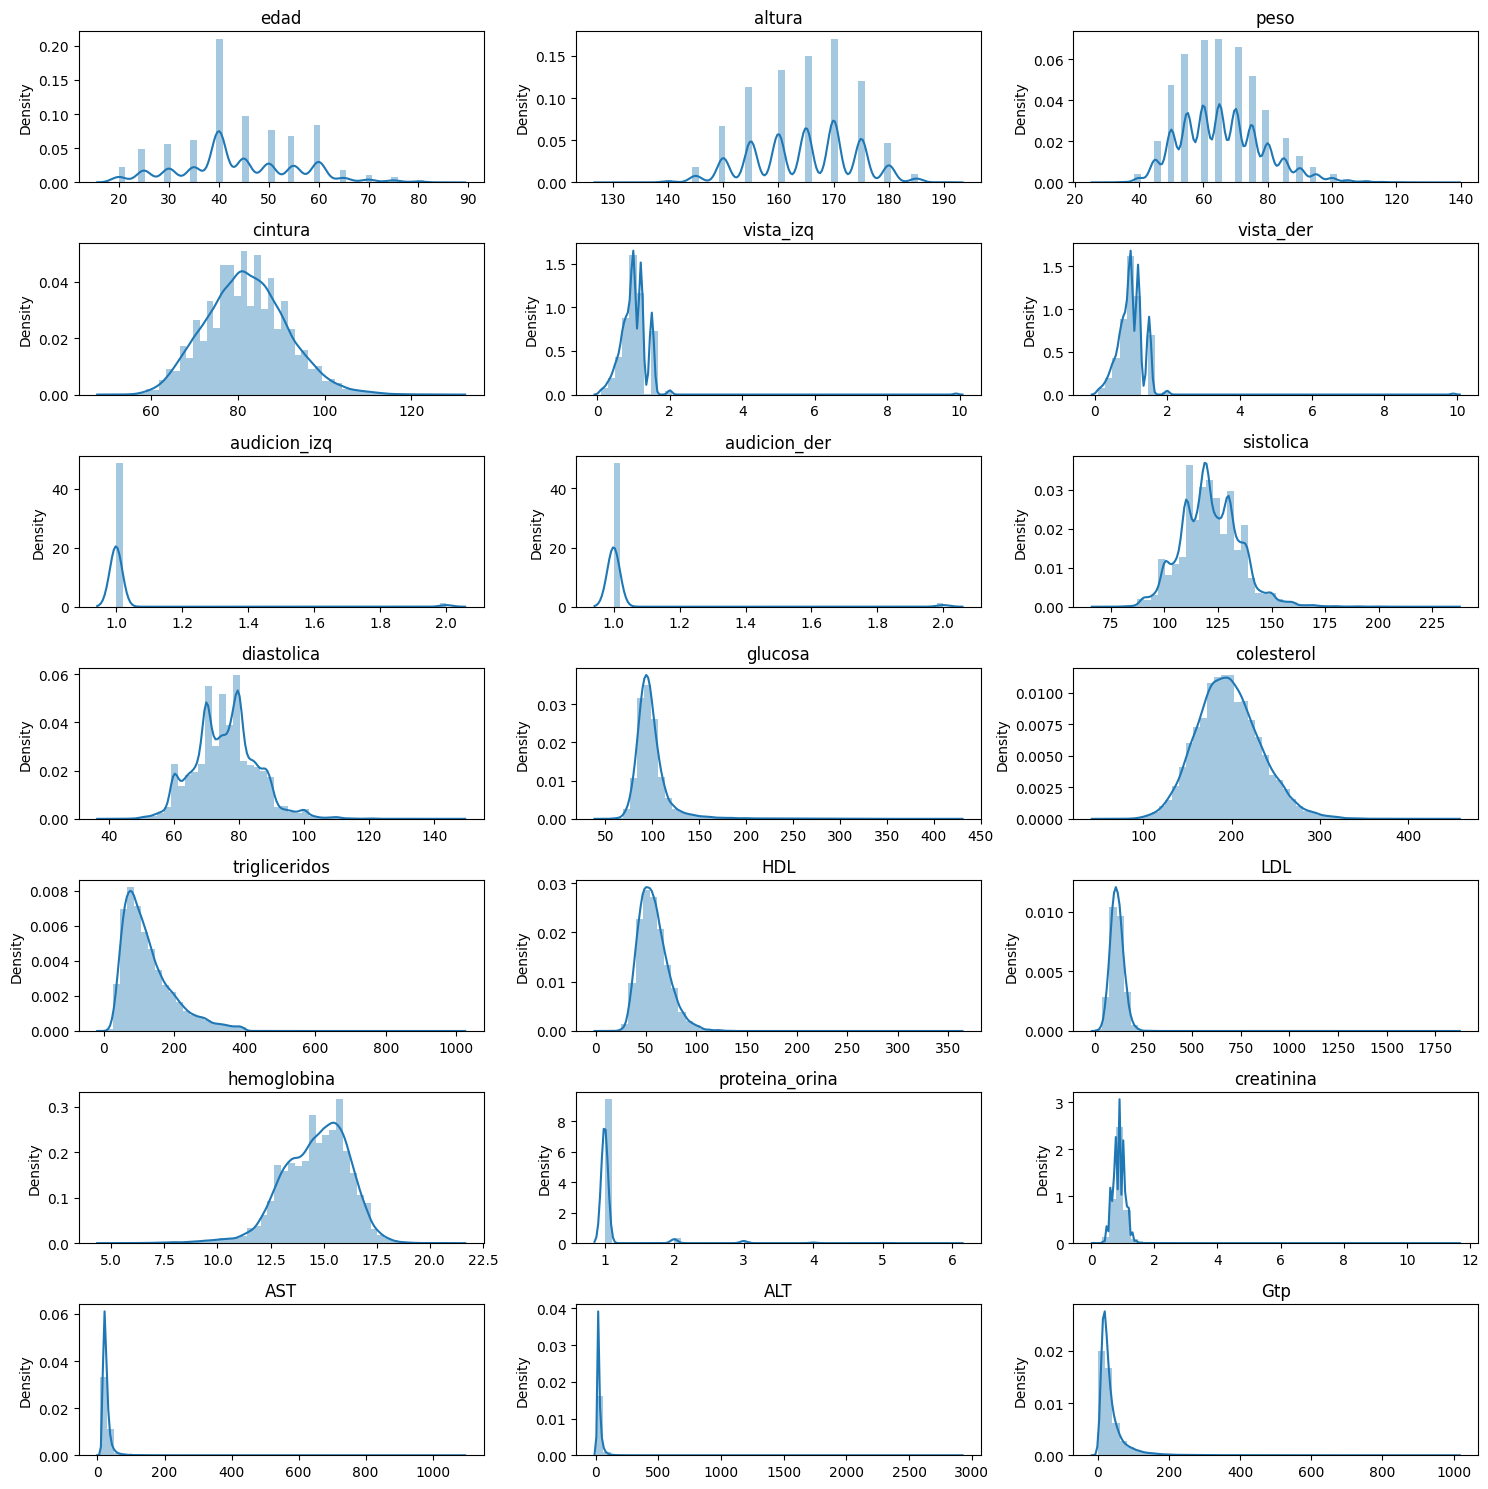

In [15]:
#df.hist(figsize=(16, 18), bins=40, xlabelsize=8, ylabelsize=8)

variables = ['edad', 'altura', 'peso', 'cintura', 'vista_izq', 'vista_der',
       'audicion_izq', 'audicion_der', 'sistolica', 'diastolica', 'glucosa',
       'colesterol', 'trigliceridos', 'HDL', 'LDL', 'hemoglobina',
       'proteina_orina', 'creatinina', 'AST', 'ALT', 'Gtp']

columns = 3

fig, axes = plt.subplots(len(variables) //columns, columns, figsize=(15,15))

for current_idx, variable in enumerate(variables):
    i = current_idx // columns
    j = current_idx % columns
    sns.distplot(df[variable], ax=axes[i][j])
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")

plt.tight_layout()


Las variables edad, altura, peso, cintura, sistólica, diastólica, glucosa,colesterol, HDL,LDL, hemoglobina y creatinina; parecen ser distribuciones normales pero por los outliers de éstas en algunas no se logra visualizar bien, como es el caso de las variables HDL, LDL y creatinina. Por lo que realizaré un análisis de Outliers y probablemente eliminaré algunos datos si éstos (unos pocos) son los culpables de outliers en muchas variables.


<Figure size 640x480 with 0 Axes>

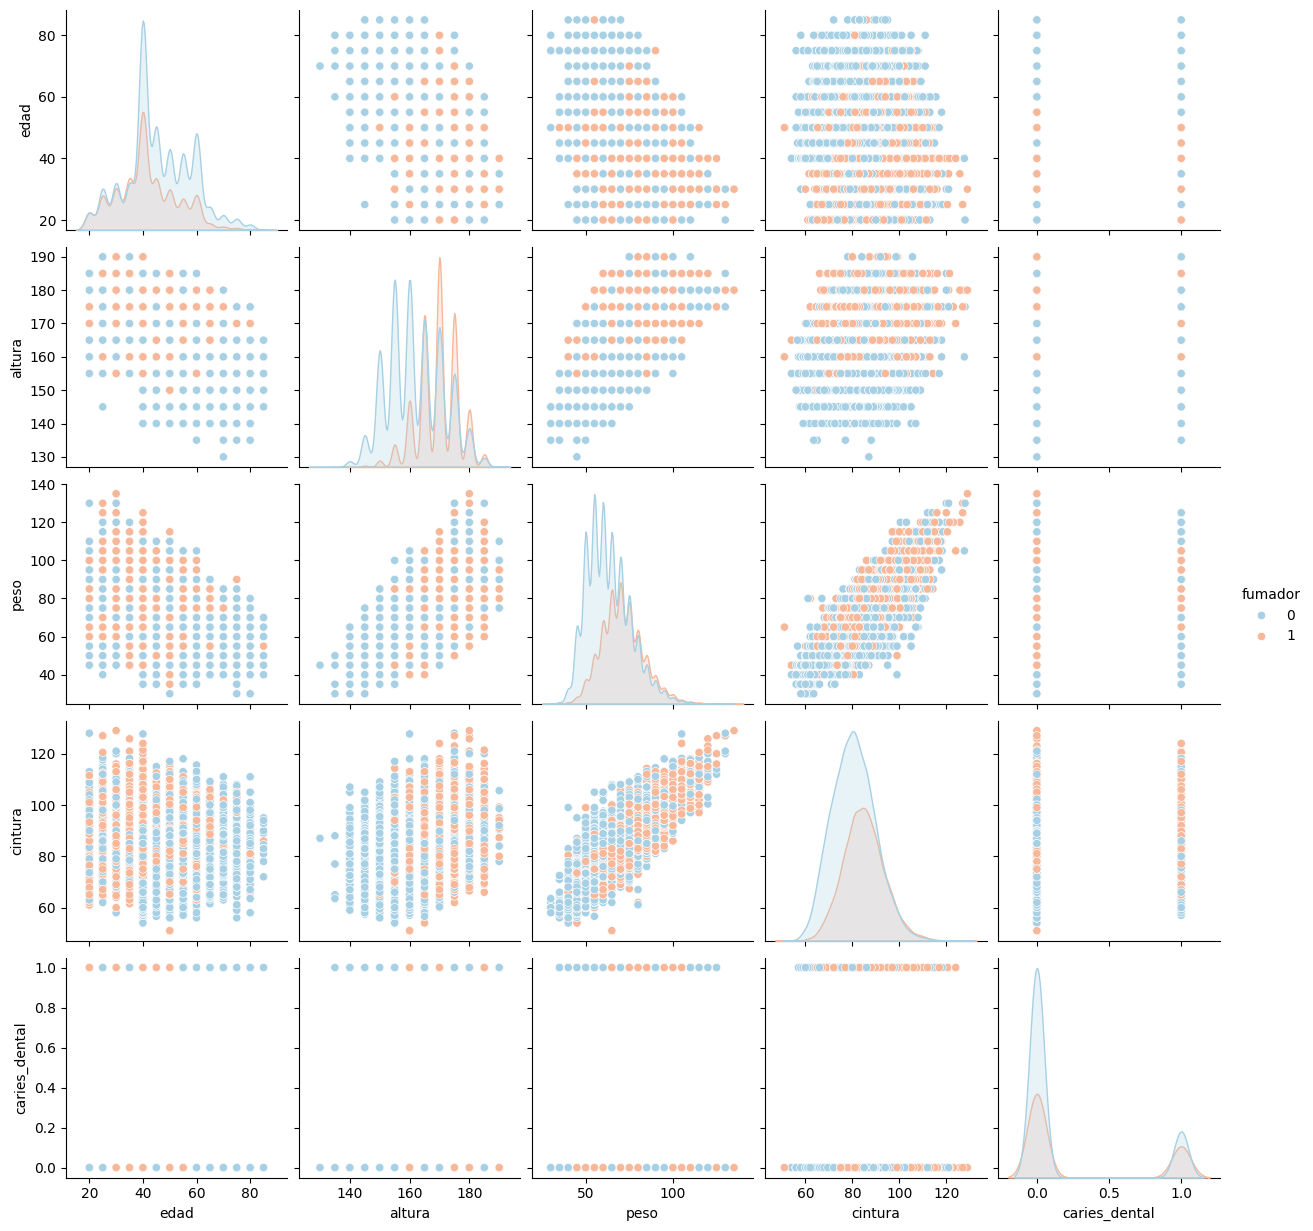

In [16]:
plotear=['edad', 'altura', 'peso', 'cintura', 'caries_dental','fumador']
      # , 'sistolica', 'diastolica', 'glucosa',
       #'colesterol', 'trigliceridos', 'HDL', 'LDL', 'hemoglobina',
     #  'proteina_orina', 'creatinina', 'AST', 'ALT', 'Gtp'
plt.figure()
sns.pairplot(data=df[plotear],hue='fumador',palette='RdBu_r')
plt.show()

Relación directa entre altura y peso, peso y cintura; relación inversa debil entre altura y edad

###Outliers

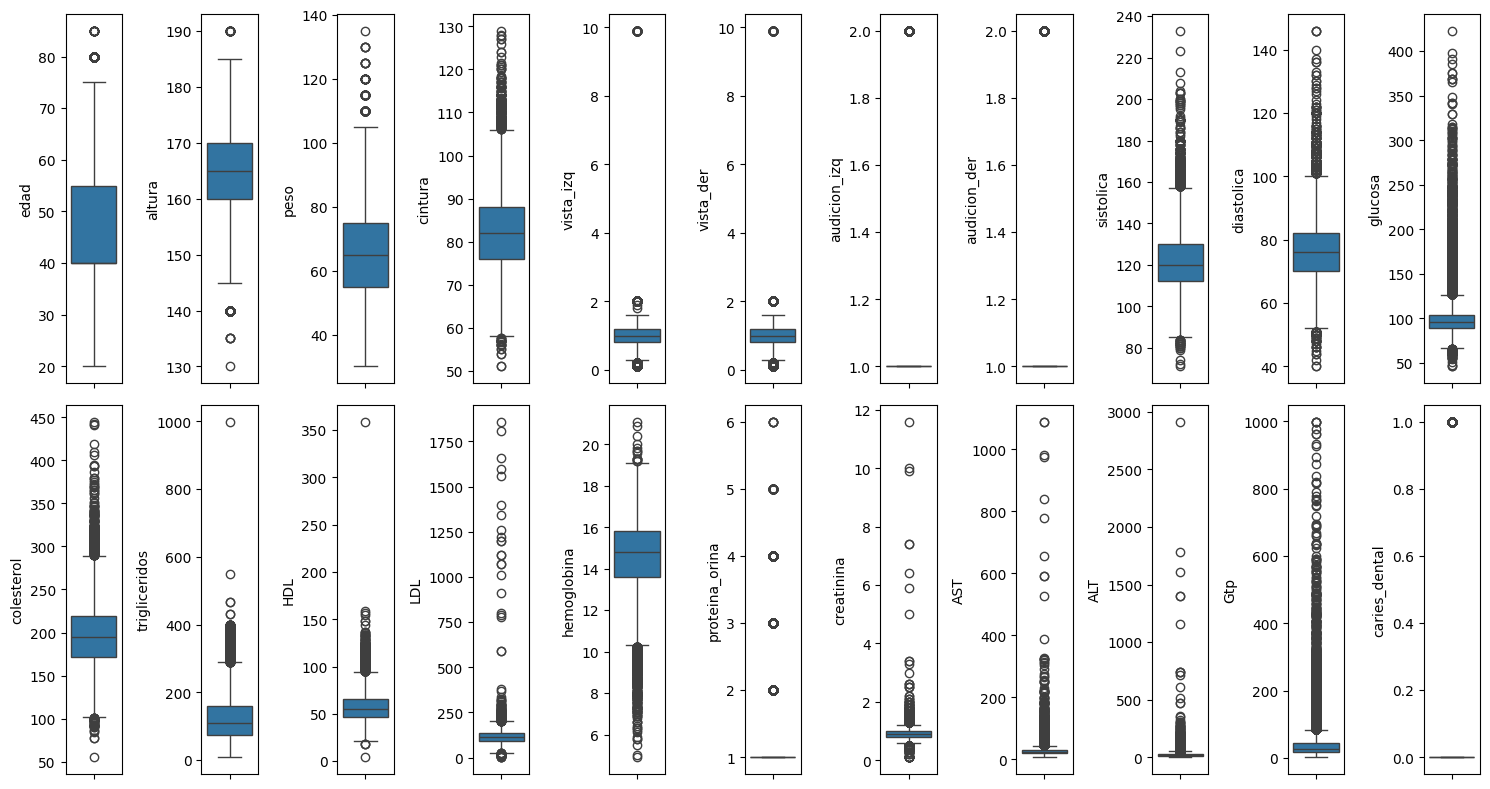

In [17]:
variables=['edad', 'altura', 'peso', 'cintura', 'vista_izq', 'vista_der',
       'audicion_izq', 'audicion_der', 'sistolica', 'diastolica', 'glucosa',
       'colesterol', 'trigliceridos', 'HDL', 'LDL', 'hemoglobina',
       'proteina_orina', 'creatinina', 'AST', 'ALT', 'Gtp','caries_dental']

fig, axes = plt.subplots(2,11, figsize=(15,8))

for ax, variable in zip (axes.ravel(), variables):
  ax=sns.boxplot(y=variable,data=df,ax=ax)

plt.tight_layout()


Voy a eliminar outliers que son extremadamente fuera de los rangos "normales" como en el caso de los triglicéridos, los valores superiores a 500 mg/dl

In [18]:
df=df[(df['edad']<75)]
df=df[(df['altura']>150)]
df=df[(df['vista_izq']<9)]
df=df[(df['vista_der']<9)]
df=df[(df['trigliceridos']<500)]
df=df[(df['HDL']<250)]

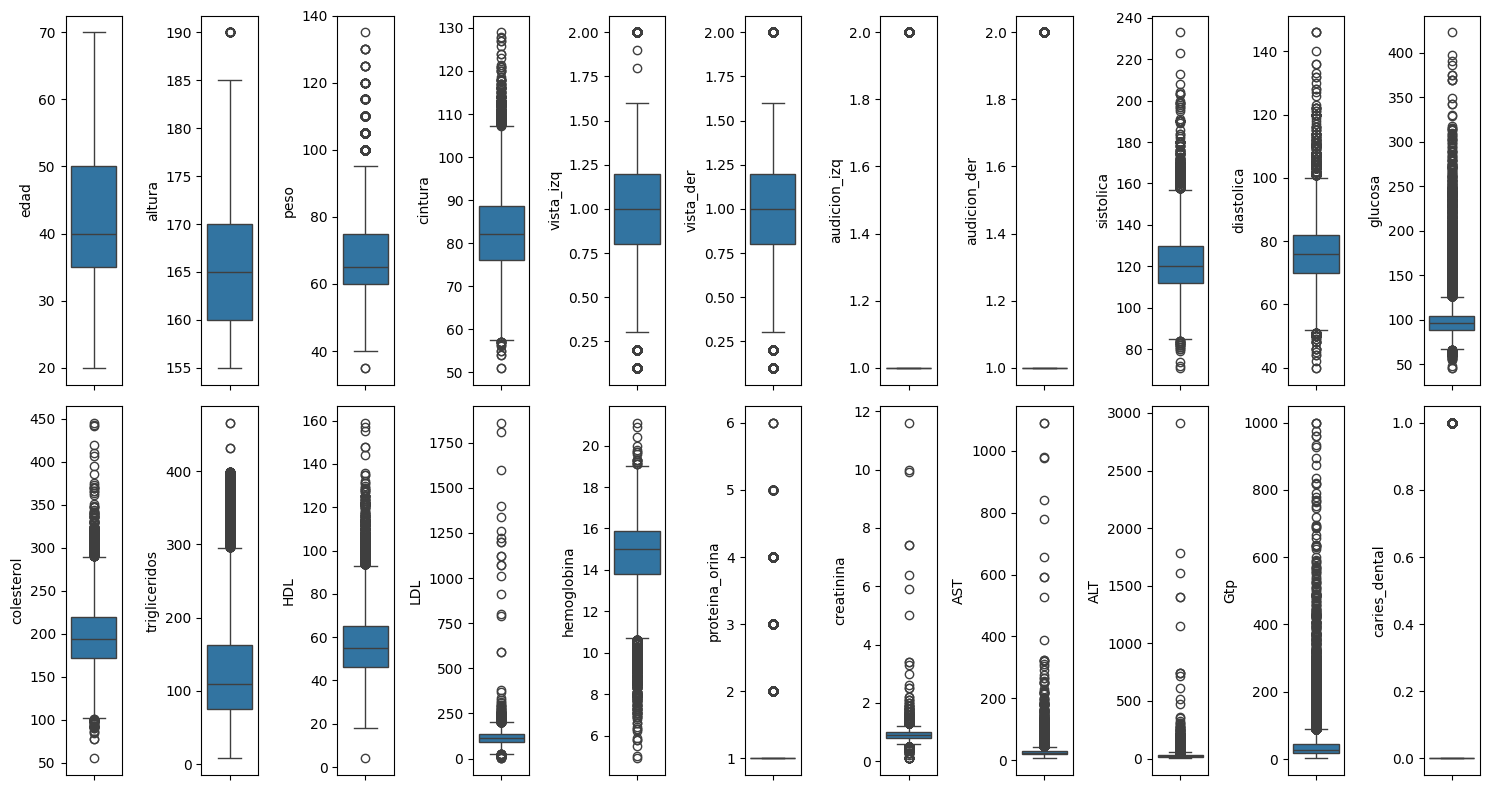

In [19]:
variables=['edad', 'altura', 'peso', 'cintura', 'vista_izq', 'vista_der',
       'audicion_izq', 'audicion_der', 'sistolica', 'diastolica', 'glucosa',
       'colesterol', 'trigliceridos', 'HDL', 'LDL', 'hemoglobina',
       'proteina_orina', 'creatinina', 'AST', 'ALT', 'Gtp','caries_dental']

fig, axes = plt.subplots(2,11, figsize=(15,8))

for ax, variable in zip (axes.ravel(), variables):
  ax=sns.boxplot(y=variable,data=df,ax=ax)

plt.tight_layout()

###Correlación

In [20]:
corrmat=df.corr()
corrmat

,edad,altura,peso,cintura,vista_izq,vista_der,audicion_izq,audicion_der,sistolica,diastolica,...,HDL,LDL,hemoglobina,proteina_orina,creatinina,AST,ALT,Gtp,caries_dental,fumador
edad,1.000000,-0.422058,-0.272891,-0.019303,-0.274495,-0.273580,0.146682,0.151072,0.101559,0.065560,...,-0.007071,0.050591,-0.226156,0.033073,-0.082665,0.024511,-0.057597,0.038097,-0.110887,-0.101130
altura,-0.422058,1.000000,0.636900,0.382762,0.181765,0.189044,-0.048584,-0.045216,0.113237,0.114872,...,-0.211683,-0.029152,0.497259,-0.000022,0.338895,0.052009,0.123682,0.115485,0.073611,0.331384
peso,-0.272891,0.636900,1.000000,0.842663,0.125780,0.130263,-0.033675,-0.033202,0.298399,0.284683,...,-0.369989,0.061824,0.457636,0.028776,0.285125,0.132895,0.252685,0.198750,0.070758,0.249122
cintura,-0.019303,0.382762,0.842663,1.000000,0.030150,0.033988,0.006343,0.008402,0.325824,0.302075,...,-0.387523,0.091387,0.380925,0.042911,0.216016,0.147003,0.254839,0.238576,0.046674,0.209193
vista_izq,-0.274495,0.181765,0.125780,0.030150,1.000000,0.686503,-0.062868,-0.068368,-0.016536,0.008445,...,-0.017433,-0.010784,0.109312,-0.030247,0.054814,-0.005909,0.030242,-0.004039,0.013462,0.059424
vista_der,-0.273580,0.189044,0.130263,0.033988,0.686503,1.000000,-0.062254,-0.067623,-0.009221,0.015747,...,-0.022805,-0.002605,0.114824,-0.027853,0.065326,-0.006792,0.030998,0.004119,0.020809,0.070304
audicion_izq,0.146682,-0.048584,-0.033675,0.006343,-0.062868,-0.062254,1.000000,0.469701,0.030134,0.007014,...,-0.022596,-0.013948,-0.011770,0.019885,0.006393,0.008598,0.008207,0.014856,-0.017930,-0.000210
audicion_der,0.151072,-0.045216,-0.033202,0.008402,-0.068368,-0.067623,0.469701,1.000000,0.019404,-0.008276,...,-0.016050,-0.012055,-0.015282,0.022307,0.008475,0.010680,0.009356,0.012015,-0.015946,0.001689
sistolica,0.101559,0.113237,0.298399,0.325824,-0.016536,-0.009221,0.030134,0.019404,1.000000,0.767377,...,-0.098824,0.022919,0.205674,0.051115,0.077956,0.087753,0.101555,0.179542,0.037477,0.083241
diastolica,0.065560,0.114872,0.284683,0.302075,0.008445,0.015747,0.007014,-0.008276,0.767377,1.000000,...,-0.103559,0.041149,0.239384,0.053193,0.092451,0.089588,0.109132,0.183507,0.035898,0.103889


In [21]:
fig=px.imshow(corrmat,
              x=corrmat.columns,
              y=corrmat.columns,
              color_continuous_scale='RdBu_r',
              zmin=-1,
              zmax=1,
              aspect='auto',
              title='Matriz de Correlación')

fig.update_layout(
    width=1000,
    height=1000
)

fig.update_traces(text=corrmat.round(2),texttemplate='%{text}')

fig.show()

Correlación directa mayor a 0.4:

- altura / peso
- altura / hemoglobina
- peso / cintura
- peso / hemoglobina
- audicion_der / audicion_izq
- vista_izq / vista_der
- sistólica / diastólica
- LDL / colesterol
- ALT / AST
- hemoglobina / fumador

Correlación inversa mayor a -0.4:

- edad / altura
- trigliceridos / HDL

##Gráficos

##Conclusiones

# Bibliografía

###### Dataset: https://www.kaggle.com/datasets/gauravduttakiit/smoker-status-prediction/data

###### (1):https://pnsd.sanidad.gob.es/ciudadanos/informacion/tabaco/menuTabaco/riesgos.htm#:~:text=C%C3%A1ncer%20de%20pulm%C3%B3n.,trombosis%2C%20hemorragias%20o%20embolias).

